#### We will be training a neural network so that it can simulate a 2 input XOR gate with numpy

In [37]:
import numpy as np

#### We will first need to make the dataset. 
Make an array X having all possible inputs to an XOR gate. And a corresponding y(output) array for the input array that you just made. Remember to match the orders in the input and output array such that the output corresponding to an input have the same indexes in the arrays.

In [38]:
N, D_in, H, D_out = 4, 2, 2, 1
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0]).reshape(4,1)

#### Parameters of the neural network
Now initialise the weight and bias arrays. Use numpy.random

In [39]:
w1, w2 = np.random.rand(D_in, H), np.random.rand(H,D_out)
b1, b2 = np.random.rand(N,H), np.random.rand(N,D_out)

#### Hyperparameters
1) learning rate

In [40]:
lr = 0.001

#### Declare variables for training and visualisation of loss later
1) number of iterations<br>
2) a list where we can append loss for each iteration

In [41]:
iterations = 1000
Loss = []

#### Make a function for the relu non-linearity. 
It should take an input array and return an array on which the relu non-linearity has been applied

In [42]:
def relu(input):
    return np.maximum(input, 0)

#### Train the neural network

1) First forward prop and generate an output<br>
2) Get the loss<br>
3) Backprop through the layers<br>

In [43]:
for t in range(iterations):

        #ForwardPropogation
        h=x.dot(w1) + b1
        
        a=relu(h)
        y_pred = a.dot(w2) + b2
        loss = np.square(y_pred - y).sum()
        Loss.append(loss)
        print(t,loss)


        #BackProp
        grad_y_pred = 2*(y_pred - y)
        grad_w2 = a.T.dot(grad_y_pred)
        grad_b2 = grad_y_pred
        grad_a = grad_y_pred.dot(w2.T)
        grad_h = grad_a.copy()
        grad_h[h<0] = 0
        grad_w1 = x.T.dot(grad_h)
        grad_b1 = grad_h

        w1 -= 0.001*grad_w1
        w2 -= 0.001*grad_w2
        b1 -= 0.001*grad_b1
        b2 -= 0.001*grad_b2

0 16.3579604969447
1 15.481232874686782
2 14.677354992543297
3 13.938396236372316
4 13.257485613113232
5 12.628645291121643
6 12.046653991691638
7 11.50693424823983
8 11.005458869180547
9 10.538672943830992
10 10.103428499308142
11 9.697220228630753
12 9.319805765956886
13 8.965620186855976
14 8.632785978484314
15 8.319613133984388
16 8.024576968202751
17 7.746298949327555
18 7.483530085405733
19 7.235136482684849
20 7.00008675629546
21 6.777441025828555
22 6.566341271133091
23 6.366002858947641
24 6.175707080204705
25 5.994794562135247
26 5.822659439557375
27 5.658744186682627
28 5.50253502500092
29 5.353557834785343
30 5.2113745078749005
31 5.075579687962377
32 4.945797851891721
33 4.821680691666736
34 4.702904762164187
35 4.589169364073344
36 4.480194635470085
37 4.3757198287758765
38 4.275501752732976
39 4.1793133615163205
40 4.08694247525757
41 3.9981906181265012
42 3.912871961740496
43 3.830812363088768
44 3.751848487393829
45 3.675827007413232
46 3.6026038716312145
47 3.53204363

764 0.052621503826111374
765 0.05236518584393722
766 0.052116676988649524
767 0.0518718968749195
768 0.051619376715489364
769 0.0513681461194207
770 0.05111819824549539
771 0.050883719146907286
772 0.05063710409347662
773 0.05039085690059673
774 0.050145866226699885
775 0.049908684793154495
776 0.04967428916253827
777 0.04943292360598617
778 0.049192788903889804
779 0.04895387852881891
780 0.048729488740742594
781 0.04849394386755419
782 0.04825856592370036
783 0.04802438730683091
784 0.04779689810730549
785 0.04757353898336831
786 0.04734282070082836
787 0.047113277259621916
788 0.04688490243201434
789 0.04666906302838196
790 0.04644516937688973
791 0.046220166452622384
792 0.04599630829085135
793 0.04577702510538143
794 0.04556525052930732
795 0.04534469548472131
796 0.045125261842713246
797 0.04490694366175487
798 0.04469825834859868
799 0.04448649817544828
800 0.04427139874395952
801 0.04405739201949449
802 0.043844967111265946
803 0.0436452296010951
804 0.04343437600126247
805 0.0

In [44]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

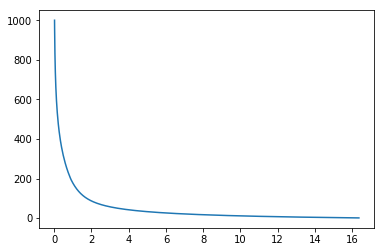

In [46]:
plt.plot(Loss, np.arange(1, len(Loss)+1))